# Step
- Data exploration
- EDA (Exploratory data analysis)
- Feature Engineering
- Transformation
- Splitting the data into train test sets
- Build our NN model
- Predict the test data and find accuracy
- Predict the feature data
- Create the web app for model using streamlit

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
# BTC - USD
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
stock = "BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-11-12 00:00:00+00:00,423.561005,423.561005,429.717987,367.984985,367.984985,45783200
2014-11-13 00:00:00+00:00,420.734985,420.734985,457.092987,401.122986,427.273010,58945000
2014-11-14 00:00:00+00:00,397.817993,397.817993,419.252014,384.789001,418.416992,29589200
2014-11-15 00:00:00+00:00,376.132996,376.132996,405.528015,371.007996,399.649994,15727500
2014-11-16 00:00:00+00:00,387.881989,387.881989,390.799011,374.601990,374.730011,11905600


In [4]:
bit_coin_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03
mean,18847.277756,18847.277756,19250.335563,18378.657089,18824.217375,1.820866e+10
std,20435.830186,20435.830186,20862.323497,19933.697713,20406.957861,1.945985e+10
min,178.102997,178.102997,211.731003,171.509995,176.897003,6.491650e+06
25%,1791.575012,1791.575012,1831.937531,1710.480042,1762.482513,7.709897e+08
50%,9373.948730,9373.948730,9540.397461,9230.836914,9355.095215,1.466709e+10
75%,30265.631348,30265.631348,30635.280762,29649.052734,30245.115723,2.924024e+10
max,89100.085938,89100.085938,89891.765625,86723.609375,88741.789062,3.509679e+11


In [5]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2014-11-12 00:00:00+00:00 to 2024-11-12 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  3654 non-null   float64
 1   (Close, BTC-USD)      3654 non-null   float64
 2   (High, BTC-USD)       3654 non-null   float64
 3   (Low, BTC-USD)        3654 non-null   float64
 4   (Open, BTC-USD)       3654 non-null   float64
 5   (Volume, BTC-USD)     3654 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 199.8 KB


In [6]:
bit_coin_data.isna().sum()

,,0
Price,Ticker,
Adj Close,BTC-USD,0
Close,BTC-USD,0
High,BTC-USD,0
Low,BTC-USD,0
Open,BTC-USD,0
Volume,BTC-USD,0


In [7]:
Closing_price = bit_coin_data[["Close"]]
Closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-11-12 00:00:00+00:00,423.561005
2014-11-13 00:00:00+00:00,420.734985
2014-11-14 00:00:00+00:00,397.817993
2014-11-15 00:00:00+00:00,376.132996
2014-11-16 00:00:00+00:00,387.881989
...,...
2024-11-08 00:00:00+00:00,76545.476562
2024-11-09 00:00:00+00:00,76778.867188


In [8]:
import seaborn as sns
%matplotlib inline
sns.set_theme()

<Figure size 1500x500 with 0 Axes>

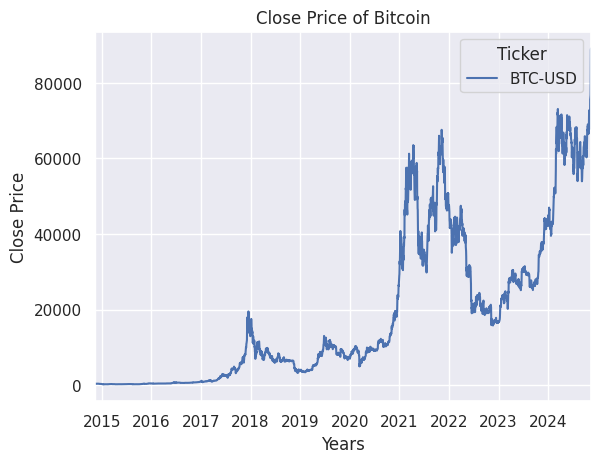

In [9]:
plt.figure(figsize = (15,5))
Closing_price["Close"].plot()
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

In [10]:
# Check number days of each year
for i in range(2014, 2025):
    print(f"The number days of {i} {list(Closing_price.index.year).count(i)} days")

The number days of 2014 50 days
The number days of 2015 365 days
The number days of 2016 366 days
The number days of 2017 365 days
The number days of 2018 365 days
The number days of 2019 365 days
The number days of 2020 366 days
The number days of 2021 365 days
The number days of 2022 365 days
The number days of 2023 365 days
The number days of 2024 317 days


In [11]:
Closing_price["MA_for_365_days"] = Closing_price.rolling(365).mean()
Closing_price["MA_for_365_days"]

<ipython-input-11-dd12f7c021e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price["MA_for_365_days"] = Closing_price.rolling(365).mean()


,MA_for_365_days
Date,
2014-11-12 00:00:00+00:00,NaN
2014-11-13 00:00:00+00:00,NaN
2014-11-14 00:00:00+00:00,NaN
2014-11-15 00:00:00+00:00,NaN
2014-11-16 00:00:00+00:00,NaN
...,...
2024-11-08 00:00:00+00:00,58005.662382
2024-11-09 00:00:00+00:00,58113.785392
2024-11-10 00:00:00+00:00,58232.514533


In [12]:
Closing_price["MA_for_365_days"].to_frame().iloc[0:365]

,MA_for_365_days
Date,
2014-11-12 00:00:00+00:00,NaN
2014-11-13 00:00:00+00:00,NaN
2014-11-14 00:00:00+00:00,NaN
2014-11-15 00:00:00+00:00,NaN
2014-11-16 00:00:00+00:00,NaN
...,...
2015-11-07 00:00:00+00:00,NaN
2015-11-08 00:00:00+00:00,NaN
2015-11-09 00:00:00+00:00,NaN


<Figure size 640x480 with 0 Axes>

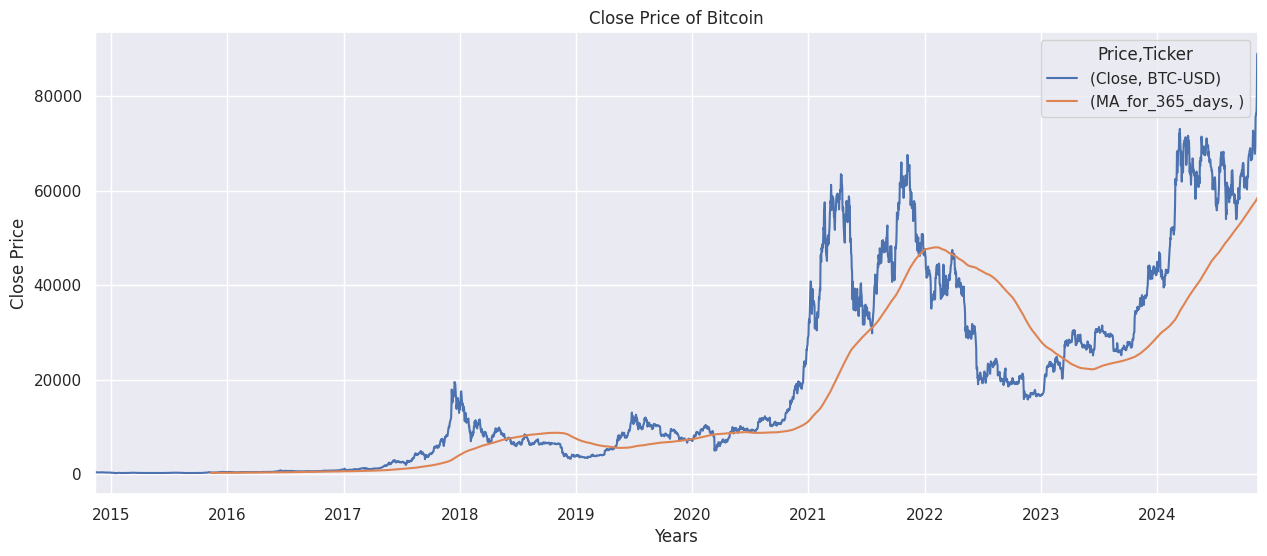

In [13]:
plt.figure()
Closing_price[["Close", "MA_for_365_days"]].plot(figsize = (15,6))
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

MA for 100 days

In [14]:
Closing_price["MA_for_100_days"] = Closing_price["Close"].rolling(100).mean()
Closing_price["MA_for_100_days"].head()

<ipython-input-14-692c8374f9e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price["MA_for_100_days"] = Closing_price["Close"].rolling(100).mean()


,MA_for_100_days
Date,
2014-11-12 00:00:00+00:00,NaN
2014-11-13 00:00:00+00:00,NaN
2014-11-14 00:00:00+00:00,NaN
2014-11-15 00:00:00+00:00,NaN
2014-11-16 00:00:00+00:00,NaN


<Figure size 640x480 with 0 Axes>

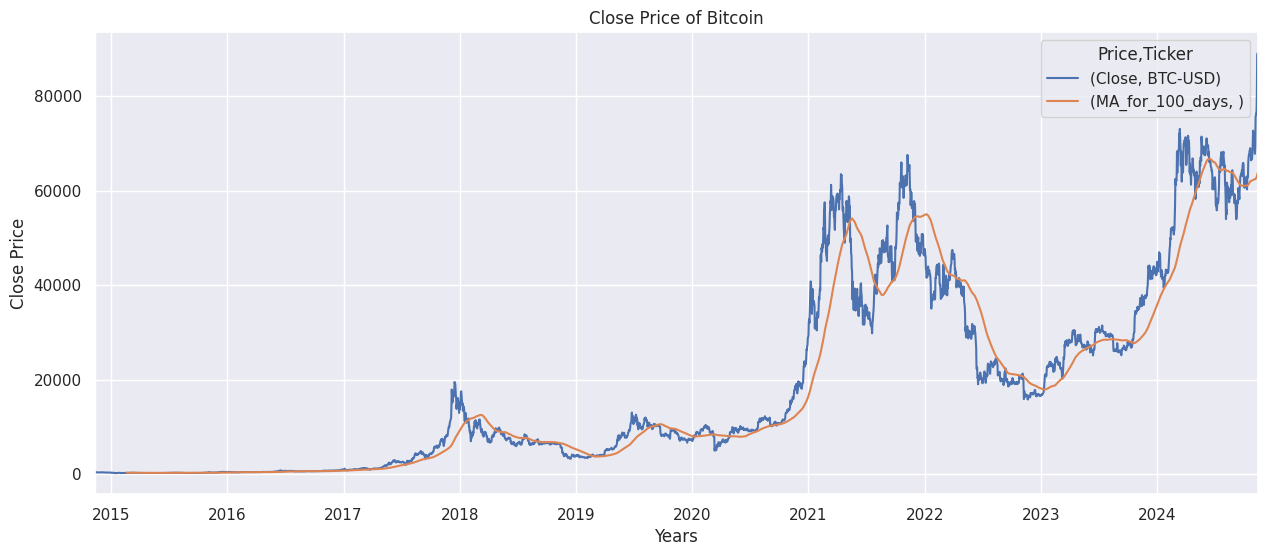

In [15]:
plt.figure()
Closing_price[["Close", "MA_for_100_days"]].plot(figsize = (15,6))
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

In [16]:
# 1 to 100 ==> 101 day
# 2 to 101 (100 days) ==> 102 day
# 3 to 102 (100 days) ==> 103rd day feature days close price using our model

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Closing_price[["Close"]].values)
scaled_data

array([[0.00276037],
       [0.00272859],
       [0.00247087],
       ...,
       [0.90299476],
       [0.9955174 ],
       [1.        ]])

In [18]:
scaled_data.shape

(3654, 1)

In [19]:
x_data = []
y_data = []

base_days = 100
for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [20]:
x_data[0], y_data[0]

(array([[0.00276037],
        [0.00272859],
        [0.00247087],
        [0.00222701],
        [0.00235914],
        [0.0023538 ],
        [0.00221649],
        [0.00227674],
        [0.00202129],
        [0.00194266],
        [0.00196596],
        [0.00213074],
        [0.00223565],
        [0.00221818],
        [0.00213971],
        [0.00215433],
        [0.00223054],
        [0.00221979],
        [0.00224853],
        [0.00226201],
        [0.00228528],
        [0.00221438],
        [0.00215358],
        [0.00223512],
        [0.00221185],
        [0.00221534],
        [0.00206705],
        [0.00195808],
        [0.00189224],
        [0.00193881],
        [0.00196171],
        [0.00190361],
        [0.00195147],
        [0.00188077],
        [0.00167517],
        [0.00159323],
        [0.00149899],
        [0.00157149],
        [0.00170771],
        [0.00160523],
        [0.00172941],
        [0.00175962],
        [0.00162424],
        [0.00158459],
        [0.00168486],
        [0

In [21]:
len_train = int(len(x_data) * 0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3198, 100, 1)
(3198, 1)
(356, 100, 1)
(356, 1)


In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [26]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0022
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.4605e-04
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 2.9196e-04
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 2.1131e-04
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 1.8895e-04
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1.6350e-04
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.4739e-04
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1.8472e-04
Epoch 9/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 2.6421e-04
Epoch 10/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 1.3653e-04


In [27]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [28]:
predictions

array([[0.4137803 ],
       [0.41269797],
       [0.41740295],
       [0.4183619 ],
       [0.41506597],
       [0.41257915],
       [0.41857883],
       [0.41903058],
       [0.41755465],
       [0.42791075],
       [0.4366252 ],
       [0.44233045],
       [0.46415824],
       [0.4874808 ],
       [0.48407745],
       [0.47915316],
       [0.48861235],
       [0.4836296 ],
       [0.48422113],
       [0.45642596],
       [0.4585829 ],
       [0.4741431 ],
       [0.47584185],
       [0.464131  ],
       [0.4675595 ],
       [0.4580437 ],
       [0.47175527],
       [0.46798527],
       [0.48323065],
       [0.48566702],
       [0.48719797],
       [0.48433506],
       [0.47636107],
       [0.48284206],
       [0.4707866 ],
       [0.48090354],
       [0.4719253 ],
       [0.46623415],
       [0.4667896 ],
       [0.46796867],
       [0.4888566 ],
       [0.49769035],
       [0.47459757],
       [0.48929524],
       [0.4889042 ],
       [0.48706132],
       [0.48651162],
       [0.520

In [29]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[36972.27 ],
       [36876.027],
       [37294.402],
       [37379.676],
       [37086.594],
       [36865.46 ],
       [37398.965],
       [37439.133],
       [37307.89 ],
       [38228.777],
       [39003.684],
       [39511.004],
       [41451.977],
       [43525.863],
       [43223.23 ],
       [42785.35 ],
       [43626.484],
       [43183.41 ],
       [43236.008],
       [40764.406],
       [40956.207],
       [42339.848],
       [42490.906],
       [41449.55 ],
       [41754.42 ],
       [40908.258],
       [42127.52 ],
       [41792.28 ],
       [43147.934],
       [43364.58 ],
       [43500.715],
       [43246.137],
       [42537.074],
       [43113.38 ],
       [42041.383],
       [42941.   ],
       [42142.637],
       [41636.57 ],
       [41685.96 ],
       [41790.805],
       [43648.203],
       [44433.72 ],
       [42380.26 ],
       [43687.207],
       [43652.438],
       [43488.562],
       [43439.684],
       [46420.457],
       [45572.77 ],
       [46083.78 ],


In [30]:
inv_y_test = scaler.inverse_transform(y_test)

In [31]:
inv_predictions[:5], inv_y_test[:5]

(array([[36972.27 ],
        [36876.027],
        [37294.402],
        [37379.676],
        [37086.594]], dtype=float32),
 array([[37289.62109375],
        [37720.28125   ],
        [37796.79296875],
        [37479.12109375],
        [37254.16796875]]))

In [32]:
plotting_data = pd.DataFrame({
    "Original_test_data": inv_y_test.reshape(-1),
    "Predictions": inv_predictions.reshape(-1)
})
index = Closing_price.index[len_train + 100:]
plotting_data

,Original_test_data,Predictions
0,37289.621094,36972.269531
1,37720.281250,36876.027344
2,37796.792969,37294.402344
3,37479.121094,37379.675781
4,37254.167969,37086.593750
...,...,...
351,76545.476562,74426.085938
352,76778.867188,75176.687500
353,80474.187500,75293.304688
354,88701.484375,79389.195312


<Figure size 640x480 with 0 Axes>

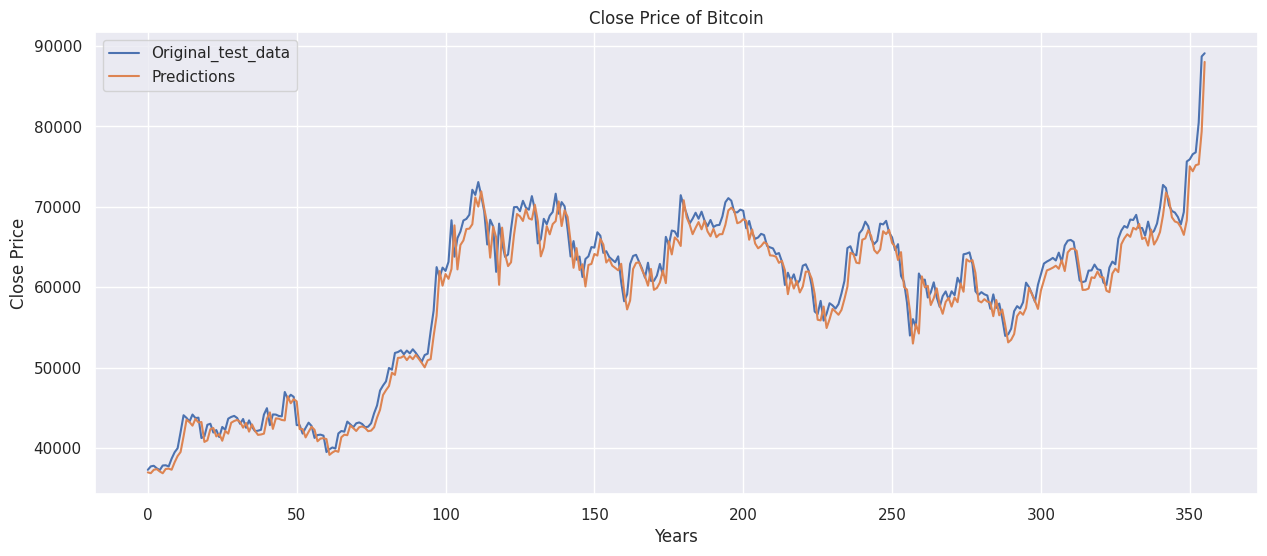

In [33]:
plt.figure()
plotting_data[["Original_test_data", "Predictions"]].plot(figsize = (15,6))
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Bitcoin");

# Predict future

In [34]:
last_100 = Closing_price[["Close"]].tail(100)

In [35]:
last_100.tail()

Price,Close
Ticker,BTC-USD
Date,
2024-11-08 00:00:00+00:00,76545.476562
2024-11-09 00:00:00+00:00,76778.867188
2024-11-10 00:00:00+00:00,80474.187500
2024-11-11 00:00:00+00:00,88701.484375
2024-11-12 00:00:00+00:00,89100.085938


In [36]:
last_100 = scaler.fit_transform(last_100["Close"].values.reshape(-1, 1)).reshape(1, -1, 1)

In [37]:
last_100

array([[[0.00121484],
        [0.05933097],
        [0.03068752],
        [0.22079911],
        [0.19718625],
        [0.19905529],
        [0.13571976],
        [0.1537854 ],
        [0.18948962],
        [0.13622572],
        [0.10273704],
        [0.14068746],
        [0.15732601],
        [0.1290196 ],
        [0.15773795],
        [0.14406393],
        [0.20558076],
        [0.18301327],
        [0.28862638],
        [0.29103416],
        [0.29543088],
        [0.25409866],
        [0.15804177],
        [0.14448588],
        [0.15474309],
        [0.14709891],
        [0.14284365],
        [0.09606277],
        [0.14689988],
        [0.09906508],
        [0.1144419 ],
        [0.06292036],
        [0.        ],
        [0.00543176],
        [0.02539911],
        [0.08735889],
        [0.10525795],
        [0.09656584],
        [0.11886485],
        [0.18840102],
        [0.1722941 ],
        [0.14890139],
        [0.12072811],
        [0.18092587],
        [0.2190792 ],
        [0

In [38]:
last_100.shape

(1, 100, 1)

In [39]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.97510797]], dtype=float32)

In [40]:
scaler.inverse_transform(day101)

array([[88225.1]], dtype=float32)

In [41]:
# day 101 = 100 day previous = day 1 + ... + day 100 = past 100
# day 102 = day 2 + .... + day 101 = day 101 + past 99
# day 103 = day 3 + ... day 102 = day 101 + day 102 + past 98

In [42]:
last_100.shape

(1, 100, 1)

In [43]:
def predict_future(no_of_days, prev_100):
    future_predictions = []
    for i in range(no_of_days):
        # Dự đoán ngày tiếp theo từ mô hình
        next_day = model.predict(prev_100)  # Không chuyển đổi thành danh sách

        # Cập nhật prev_100: Loại bỏ phần tử đầu tiên và thêm next_day vào cuối
        prev_100 = np.concatenate([prev_100[:, 1:, :], next_day.reshape(1, 1, -1)], axis=1)

        # Thêm dự đoán vào danh sách future_predictions
        future_predictions.append(scaler.inverse_transform(next_day))

    return future_predictions

In [44]:
no_of_days = 30
future_result = predict_future(no_of_days, last_100)
print(future_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [45]:
future_result = np.array(future_result).reshape(-1, 1)

In [46]:
future_result

array([[88225.1  ],
       [87249.56 ],
       [86248.695],
       [85263.734],
       [84304.68 ],
       [83388.414],
       [82530.32 ],
       [81739.79 ],
       [81019.97 ],
       [80369.06 ],
       [79782.05 ],
       [79252.17 ],
       [78771.96 ],
       [78334.05 ],
       [77931.484],
       [77558.16 ],
       [77208.766],
       [76878.9  ],
       [76564.96 ],
       [76264.12 ],
       [75974.17 ],
       [75693.44 ],
       [75420.69 ],
       [75155.016],
       [74895.77 ],
       [74642.5  ],
       [74394.88 ],
       [74152.68 ],
       [73915.71 ],
       [73683.85 ]], dtype=float32)

Text(0.5, 1.0, 'Feture Close Price of Bit Coin')

<Figure size 640x480 with 0 Axes>

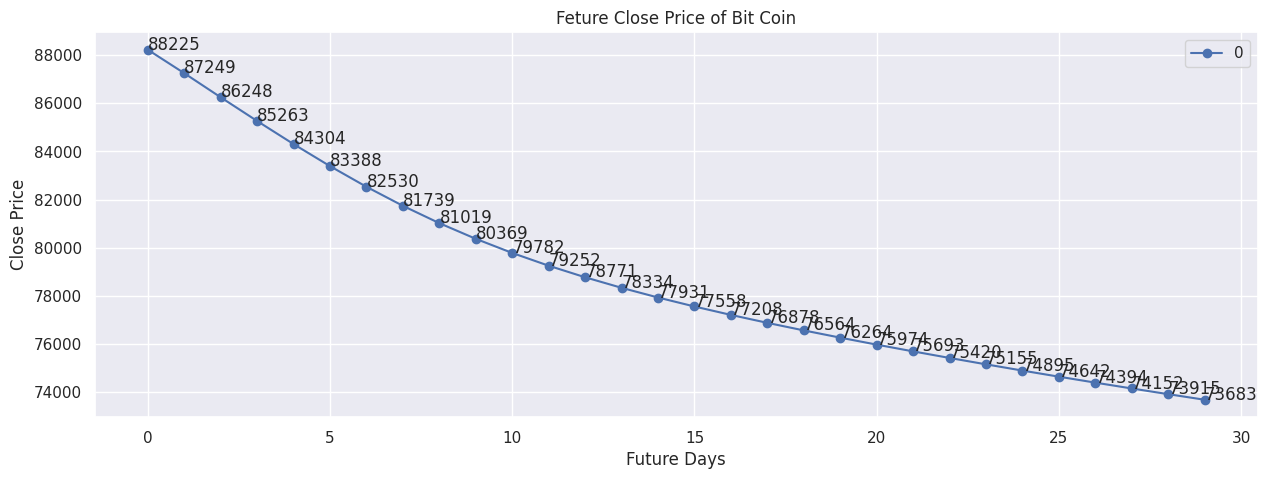

In [47]:
plt.figure()
pd.DataFrame(future_result).plot(figsize = (15,5), marker = "o")
for i in range(len(future_result)):
    plt.text(i, future_result[i], int(future_result[i][0]))
plt.xlabel("Future Days")
plt.ylabel("Close Price")
plt.title("Feture Close Price of Bit Coin")

In [48]:
import os

# Tạo thư mục models nếu chưa tồn tại
if not os.path.exists('models'):
    os.makedirs('models')

# Save models và scaler
print("Saving models...")
model.save('models/neural_network.h5')

Saving models...
